In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from num2words import num2words
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
from docx import Document

In [3]:
T = Document('book.docx')  ## Document() function reads docx file and stores it in the variable T

In [4]:
#Conversion of whole text into a List format
fullText = []
for paragraph in T.paragraphs:
    fullText.append(paragraph.text)

In [5]:
#' '.join(fullText)

In [6]:
fullText[:10]  # List of Text Lines

['',
 'WHOM THE GODS DESTROYED',
 '',
 '',
 'I',
 '',
 'The most high gods have decided that too much power over the hearts of',
 'men shall not be given to other men, for then the givers are forgotten',
 'in the gift and the smoke dies away from the altars. So they kill the',
 'men who play with souls. According to an ancient saying, before they']

In [8]:
exclude = set(string.punctuation)                                    #Set containing charachters to exclude

def remove_apostrophe(data):                                         # Function to remove apostrophe and other similar charachters
    data = np.char.replace(data,"’","")
    data = np.char.replace(data, "'", "")
    data = np.char.replace(data, "‘", "")
        
    return data                                                      # Returns updated text

def remove_punctuation(data):                                        # Function to remove punctuation,hyphen,etc..
    for i in (exclude):
        data = np.char.replace(data, i, ' ')
        #data = np.char.replace(data, " ", "")
    data = np.char.replace(data, ',', ' ')
    data = np.char.replace(data, "“", "")
    data = np.char.replace(data, '"', "")
    data = np.char.replace(data, "-", " ")
    
    return data

def convert_numbers(data):                                          #Converts numbers to words using num2words
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
   
    return new_text


In [9]:
new_list = []                                    # List data structure to store preprocessed data 
for data in fullText:                            #Loops over fullText to apply data preprocessing function
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    new_list.append(data)                       # Preprocessed data is appended to new_list

In [10]:
new_list[:10]                                   # First 10 elements

['',
 ' WHOM THE GODS DESTROYED',
 '',
 '',
 ' I',
 '',
 ' The most high gods have decided that too much power over the hearts of',
 ' men shall not be given to other men for then the givers are forgotten',
 ' in the gift and the smoke dies away from the altars So they kill the',
 ' men who play with souls According to an ancient saying before they']

In [11]:
#Chapter heading were in BLOCK Letters, Remaining data stored in new_list_2
new_list_2 = []                             
for data in new_list:
    if not (data.isupper()):
        new_list_2.append(data)

In [12]:
new_list_2[:10]

['',
 '',
 '',
 '',
 ' The most high gods have decided that too much power over the hearts of',
 ' men shall not be given to other men for then the givers are forgotten',
 ' in the gift and the smoke dies away from the altars So they kill the',
 ' men who play with souls According to an ancient saying before they',
 ' destroy the victim they make him mad There are however modifications',
 ' of the process Occasionally they make him drunk']

In [7]:
#Imported SnowballStemmer to use in future algorithms

from nltk.stem.snowball import SnowballStemmer  
stemmer = SnowballStemmer("english")               

In [13]:
#Tokenizes and stems text 
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems 

In [14]:
#Tokenizes data

def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [15]:
## Implemented Functions defined above and stored text in List data Structure
Text_stemmed = []
Text_tokenized = []
for i in new_list_2:
       
    allwords_stemmed = tokenize_and_stem(i)            #for each item in 'fullText', tokenize/stem
    Text_stemmed.extend(allwords_stemmed)              #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)              #only tokenizes
    Text_tokenized.extend(allwords_tokenized)          # extends Text_tokenize by adding newly tokenized list of words

In [54]:
Text_stemmed[:11]                                      # top 15 stemmed and tokenized words

['the',
 'most',
 'high',
 'god',
 'have',
 'decid',
 'that',
 'too',
 'much',
 'power',
 'over']

In [55]:
Text_tokenized[:11]                                   # Tokenized words

['the',
 'most',
 'high',
 'gods',
 'have',
 'decided',
 'that',
 'too',
 'much',
 'power',
 'over']


We can see the diffrence in both the list

Tokenized : decided

Tokenized and Stemmed : decid

In [56]:
Words = pd.DataFrame(Text_stemmed,columns=['Words'])          #Created a dataframe out of Stemmed Words

In [19]:
Words['Words'].value_counts()                                 #Count of words

the            4488
and            2811
he             2033
to             1917
a              1705
of             1462
it             1304
i              1259
in             1222
she            1160
was            1130
her            1128
that           1087
his             990
you             977
him             644
for             593
with            575
but             552
as              534
had             520
at              513
not             502
said            480
so              451
all             416
they            415
on              389
one             348
me              344
               ... 
txt               1
indemn            1
remedi            1
financi           1
disk              1
charit            1
problem           1
million           1
v                 1
po                1
owe               1
revenu            1
denot             1
transcript        1
professor         1
incomplet         1
data              1
violat            1
ak                1


In [20]:
#Count of words added to the dataframe with a new column

Counts = pd.DataFrame(Words['Words'].value_counts())
Counts = Counts.reset_index()
Counts = Counts.rename(columns={"index": "Words", "Words": "Counts"})
Counts.head(10)

,Words,Counts
0,the,4488
1,and,2811
2,he,2033
3,to,1917
4,a,1705
5,of,1462
6,it,1304
7,i,1259
8,in,1222
9,she,1160


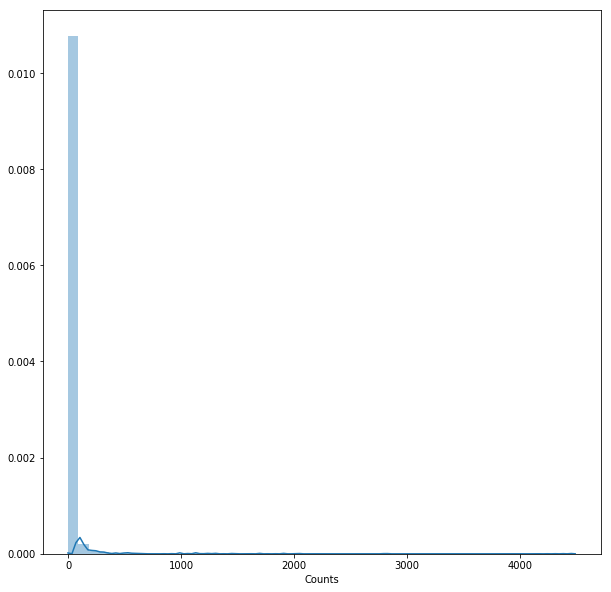

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(Counts[:]['Counts'])

The frequency distribution of words is plotted above.

We can see that majority of words have frequency aroud 0-10

In [22]:
#Created a sorted list of words to create a wordcloud using Text_stemmed list of words and wordcloud library

cloud_words = ' '
for i in range(len(Text_stemmed)): 
        Text_stemmed[i] = Text_stemmed[i].lower() 
          
for words in Text_stemmed: 
    cloud_words = cloud_words + words + ' '
    
wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(cloud_words)

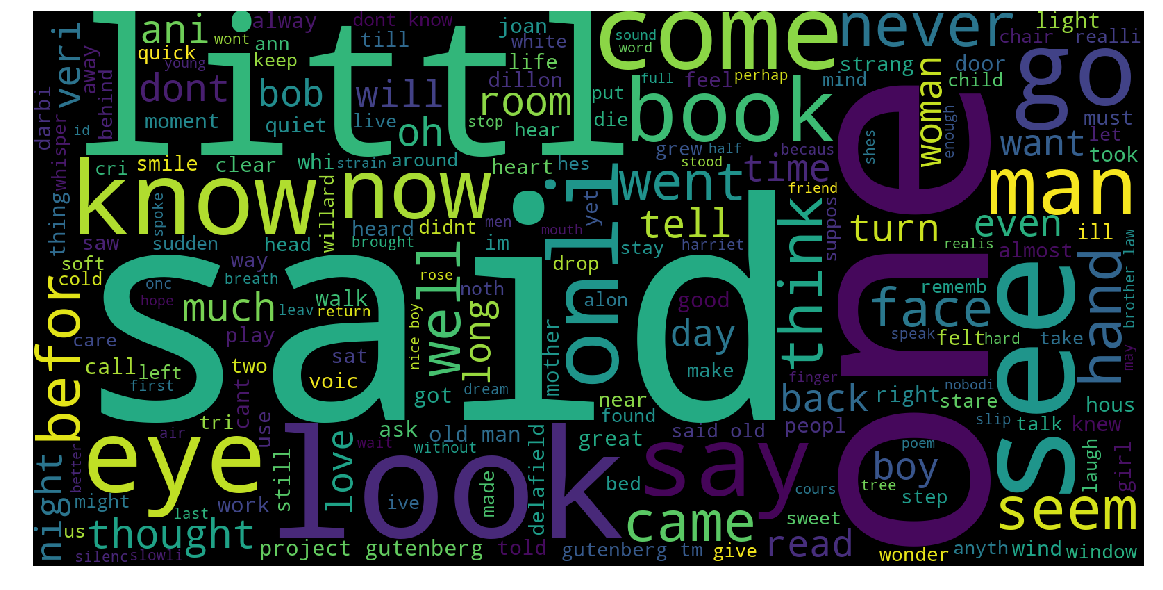

In [24]:
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Analysis after removing stopwords

In [25]:
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\drago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
stop = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves','click','nineteen','said'
       ]

stop_words = stopwords.words('english')
stop_words.extend(stop)
stop = set(stop_words)

In [27]:
# Function to remove all the stop words present in the data
def clean(data):
    stop_free = " ".join([i for i in data.lower().split() if i not in stop])
    return stop_free



In [28]:
# Data Preprocessing on the newly created data having no stop word

new_list_removed_stopwords = []
for data in fullText:
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = clean(data)
    
    new_list_removed_stopwords.append(data)

In [29]:
#Removal of Chapter Heading which are in BLOCK Letters
new_list_removed_stopwords_2 = []
for data in new_list_removed_stopwords:
    if not (data.isupper()):
        new_list_removed_stopwords_2.append(data)

In [30]:
#Two List are created

Text_stemmed_removed_stopwords = [] #Contains Stemmed words having no stopwords
Text_tokenized_removed_stopword = [] #Contains Tokenized Words having no stopwords
for i in new_list_removed_stopwords_2:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'fullText', tokenize/stem
    Text_stemmed_removed_stopwords.extend(allwords_stemmed) #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Text_tokenized_removed_stopword.extend(allwords_tokenized)

In [57]:
Words_nostop = pd.DataFrame(Text_stemmed_removed_stopwords,columns=['Words'])  #Converted Stemmed List into a Dataframe

In [32]:
Words_nostop['Words'].value_counts() #Count of Words

man             288
know            243
littl           243
eye             240
look            228
old             206
come            201
like            200
dont            194
book            172
say             168
boy             166
think           148
hand            148
im              134
room            132
work            131
oh              130
went            128
woman           120
came            120
want            118
good            118
miss            115
time            114
face            114
turn            114
day             114
thought         112
tell            106
               ... 
releas            1
version           1
statement         1
salt              1
maintain          1
numer             1
interpret         1
infring           1
eighty-seven      1
agent             1
mississippi       1
goal              1
owe               1
vii               1
network           1
discontinu        1
forty-on          1
incident          1
ninety-nin        1


In [33]:
#Created New Columns "Counts" which stores Count of all the words
Counts_new = pd.DataFrame(Words_nostop['Words'].value_counts())
Counts_new = Counts_new.reset_index()
Counts_new = Counts_new.rename(columns={"index": "Words", "Words": "Counts"})
Counts_new.head(10)

,Words,Counts
0,man,288
1,know,243
2,littl,243
3,eye,240
4,look,228
5,old,206
6,come,201
7,like,200
8,dont,194
9,book,172


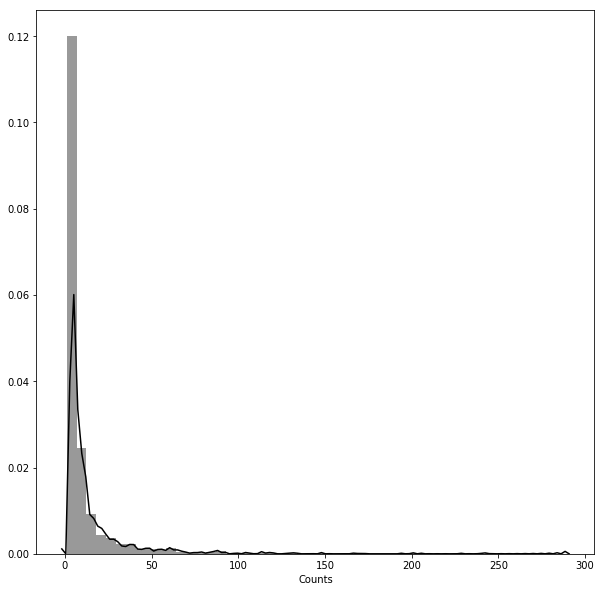

In [58]:
#Distplot of Counts
plt.figure(figsize=(10,10))
sns.distplot(Counts_new[:]['Counts'],color='black')

In [35]:
#Created a sorted list of words to create a wordcloud using Text_stemmed_removed_stopwords list of words and wordcloud library


cloud_words = ' '
for i in range(len(Text_stemmed_removed_stopwords)): 
        Text_stemmed_removed_stopwords[i] = Text_stemmed_removed_stopwords[i].lower() 
          
for words in Text_stemmed_removed_stopwords: 
    cloud_words = cloud_words + words + ' '
    
wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(cloud_words)

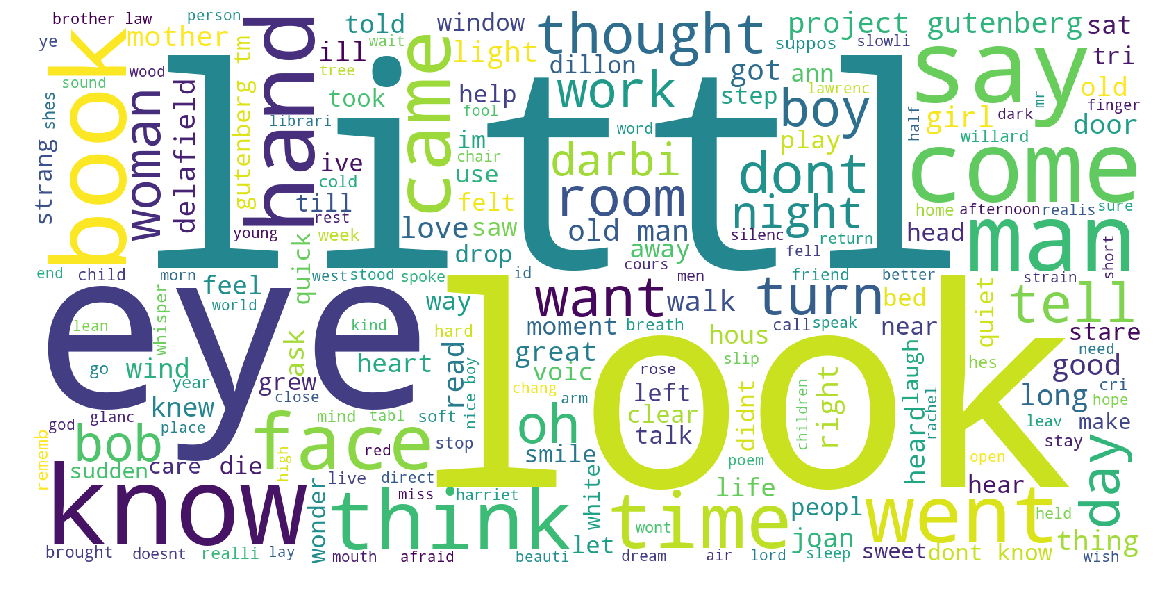

In [36]:
#Cloud of words without stopwords

plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [37]:
#Calculates Length of Words
def len_word(data):
    length = len(data)
    return length

In [38]:
#New Column containing Length is Added

Counts_new['Length'] = Counts_new['Words'].apply(len_word)

In [39]:
Counts_new.head(10)

,Words,Counts,Length
0,man,288,3
1,know,243,4
2,littl,243,5
3,eye,240,3
4,look,228,4
5,old,206,3
6,come,201,4
7,like,200,4
8,dont,194,4
9,book,172,4


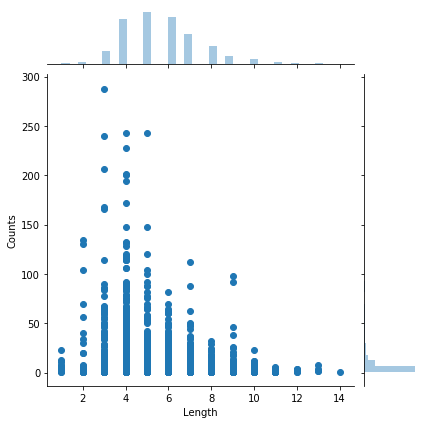

In [40]:
plt.figure(figsize=(16,8))
sns.jointplot(x='Length',y="Counts",data=Counts_new)

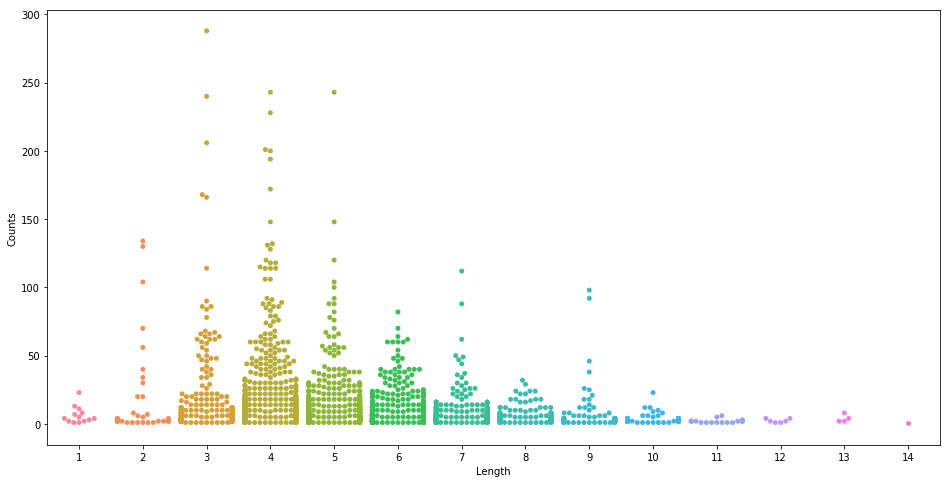

In [41]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='Length',y="Counts",data=Counts_new,)

In [42]:
tagged = nltk.pos_tag(Counts_new['Words'])

In [43]:
tags = [obj[1] for obj in tagged]

In [44]:
Counts_new['Tags'] = tags

In [45]:
Counts_new.head(15)

,Words,Counts,Length,Tags
0,man,288,3,NN
1,know,243,4,VBP
2,littl,243,5,VBZ
3,eye,240,3,NN
4,look,228,4,NN
5,old,206,3,JJ
6,come,201,4,VBP
7,like,200,4,IN
8,dont,194,4,JJ
9,book,172,4,NN


In [50]:
Counts_new['Tags'].value_counts()

NN      2228
JJ       781
VBP      128
VBD       97
IN        50
RB        48
NNS       47
VBN       40
VB        30
JJS       27
VBZ       15
FW        15
JJR       13
VBG        9
RBR        6
MD         5
CD         5
WRB        4
CC         4
PRP$       3
PRP        2
WP         2
NNP        2
RBS        1
RP         1
TO         1
Name: Tags, dtype: int64

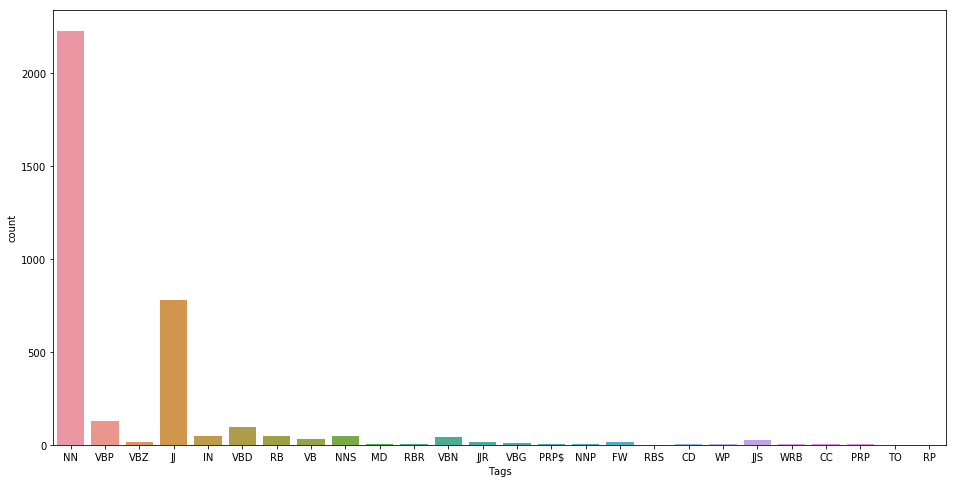

In [49]:
plt.figure(figsize=(16,8))
sns.countplot(Counts_new['Tags'])